In [1]:
from tournament.agents.constant import AllC, AllD
from tournament.agents.pavlov import Pavlov
from tournament.agents.q_learning.dqn import DeepQLearner
from tournament.agents.tft import TFTT, GenerousTFT, TitForTat
from tournament.environments.single import SingleRuleBasedAgentEnvironment
from tournament.environments.multiple import MultipleRuleBasedAgentEnvironment
from tournament.agents.agents import AGENTS
from tournament.agents.axelrod_first import (
    Davis,
    Downing,
    Feld,
    Grofman,
    Grudger,
    Joss,
    Nydegger,
    Shubik,
    SteinAndRapoport,
    TidemanAndChieruzzi,
    Tullock,
)
from tournament.agents.tft import (
    TFTT,
    TTFT,
    GenerousTFT,
    GradualTFT,
    OmegaTFT,
    TitForTat,
)
from tournament.tournament import RoundRobinTournament

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# plt.rcParams["figure.figsize"] = (20, 12)
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
# env = SingleRuleBasedAgentEnvironment(TitForTat)
def get_env():
    return MultipleRuleBasedAgentEnvironment([
        TitForTat,
        # AllC,
        # TFTT,
        # TTFT,
        # GenerousTFT,
        # GradualTFT,
        OmegaTFT,
        # Davis,
        # Downing,
        # Feld,
        # Grofman,
        # Grudger,
        # Joss,
        # Nydegger,
        # Shubik,
        # SteinAndRapoport,
        # TidemanAndChieruzzi,
        # Tullock,
    ])

def play_tournament(agent):
    tournament = RoundRobinTournament(AGENTS, [agent])

    scores, times = tournament.play(
        continuation_probability=0.99654, repetitions=2, jobs=12
    )

    results = [
        (agent, round(sum(scores[agent]) / len(scores[agent])), sum(times[agent]))
        for agent in scores
    ]
    results.sort(key=lambda x: x[1], reverse=True)

    for c, score, time in results:
        print(f"{c.__name__:<30} {score:<20} {time:<20}")

In [3]:
class QNetwork(nn.Module):
    def __init__(self, lookback, n=32):
        super().__init__()

        # self.elu = nn.ELU()

        self.flatten = nn.Flatten()
        self.layer1 = nn.Linear(2 * lookback, n)
        self.layer2 = nn.Linear(n, n)
        # self.layer3 = nn.Linear(32, 32)
        self.layer4 = nn.Linear(n, 2)

        nn.init.kaiming_uniform_(self.layer1.weight, mode='fan_in', nonlinearity='relu')
        nn.init.kaiming_uniform_(self.layer2.weight, mode='fan_in', nonlinearity='relu')
        # nn.init.kaiming_uniform_(self.layer3.weight, mode='fan_in', nonlinearity='relu')
        nn.init.kaiming_uniform_(self.layer4.weight, mode='fan_in', nonlinearity='relu')

    def forward(self, x):
        x = x.unsqueeze(dim=0)
        x = self.flatten(x)
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        # x = torch.relu(self.layer3(x))
        x = torch.relu(self.layer4(x))

        return x

class QLearningTest(DeepQLearner):
    lookback = 4
    epsilon = 0.2

    def __init__(self, n = 32):
        super().__init__()

        self._learning_rate = 0.01
        self._q_network = QNetwork(self.lookback, n)


LAYER LENGTH: 4
[18:30:28] Commencement of training.
[18:30:30] Completed epoch 1: 2.072624563742429
[18:30:30] Completed epoch 2: 2.64462905217315
[18:30:31] Completed epoch 3: 2.40592973201455
[18:30:31] Completed epoch 4: 2.505540032890981
[18:30:32] Completed epoch 5: 2.6526049617231067
[18:30:32] Completed epoch 6: 2.6954084978636965
[18:30:33] Completed epoch 7: 2.7793074985768302
[18:30:34] Completed epoch 8: 2.8756672156875966
[18:30:34] Completed epoch 9: 2.897158279663924
[18:30:35] Completed epoch 10: 2.9667292916889467
[18:30:35] Completed epoch 11: 2.939855431313684
[18:30:36] Completed epoch 12: 2.9495872571277184
[18:30:37] Completed epoch 13: 2.886220337872424
[18:30:37] Completed epoch 14: 2.854330608732108
[18:30:38] Completed epoch 15: 2.8335409233348363
[18:30:38] Completed epoch 16: 2.795704473389945
[18:30:39] Completed epoch 17: 2.7978288900335384
[18:30:40] Completed epoch 18: 2.7810741152933396
[18:30:40] Completed epoch 19: 2.8041348551927734
[18:30:41] Comple

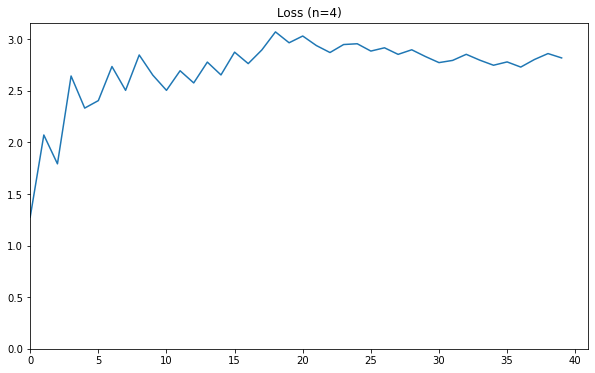

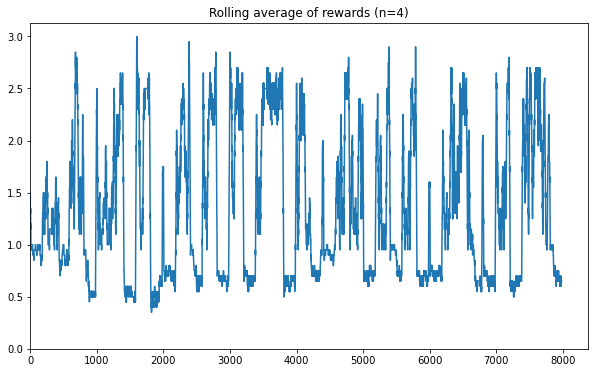

LAYER LENGTH: 8
[18:30:41] Commencement of training.
[18:30:42] Completed epoch 1: 3.3809241583390395
[18:30:43] Completed epoch 2: 3.4742633753179506
[18:30:43] Completed epoch 3: 3.4888639646136896
[18:30:44] Completed epoch 4: 3.623827187854613
[18:30:45] Completed epoch 5: 3.606119524110887
[18:30:45] Completed epoch 6: 3.6758210336106214
[18:30:46] Completed epoch 7: 3.7496652463201308
[18:30:47] Completed epoch 8: 3.784824600845145
[18:30:48] Completed epoch 9: 3.7687646926124376
[18:30:48] Completed epoch 10: 3.7752462052709705
[18:30:49] Completed epoch 11: 3.8033683858809573
[18:30:50] Completed epoch 12: 3.8332758545617343
[18:30:50] Completed epoch 13: 3.8322266943168675
[18:30:51] Completed epoch 14: 3.8480359811131892
[18:30:52] Completed epoch 15: 3.8310651672453604
[18:30:52] Completed epoch 16: 3.801934261205954
[18:30:53] Completed epoch 17: 3.813393056583268
[18:30:53] Completed epoch 18: 3.8090554478084657
[18:30:54] Completed epoch 19: 3.8171556360052006
[18:30:55] 

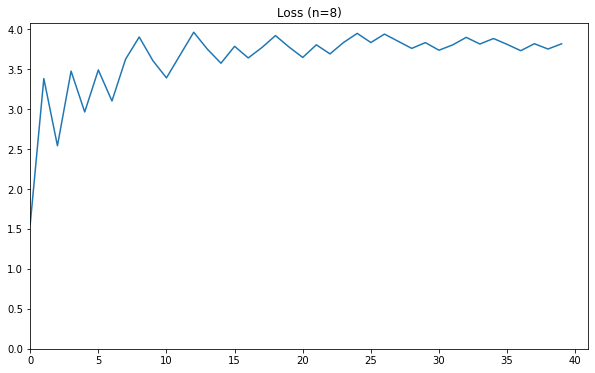

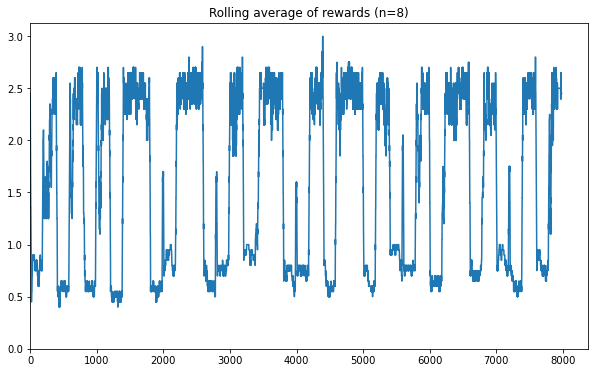

LAYER LENGTH: 12
[18:30:55] Commencement of training.
[18:30:56] Completed epoch 1: 2.717995952127967
[18:30:57] Completed epoch 2: 2.8903213109873467
[18:30:57] Completed epoch 3: 3.155739767911582
[18:30:58] Completed epoch 4: 3.260459654271581
[18:30:59] Completed epoch 5: 3.371085673118757
[18:31:00] Completed epoch 6: 3.410471184620926
[18:31:00] Completed epoch 7: 3.4293955290373592
[18:31:01] Completed epoch 8: 3.4725416471123327
[18:31:02] Completed epoch 9: 3.4796211574527627
[18:31:03] Completed epoch 10: 3.499900094935863
[18:31:03] Completed epoch 11: 3.536842557625033
[18:31:04] Completed epoch 12: 3.5449007388755005
[18:31:04] Completed epoch 13: 3.5618224677529136
[18:31:05] Completed epoch 14: 3.544694045909717
[18:31:06] Completed epoch 15: 3.545299421165359
[18:31:06] Completed epoch 16: 3.539211778148226
[18:31:07] Completed epoch 17: 3.5665836056692912
[18:31:08] Completed epoch 18: 3.602551779991649
[18:31:08] Completed epoch 19: 3.615731350353949
[18:31:09] Comple

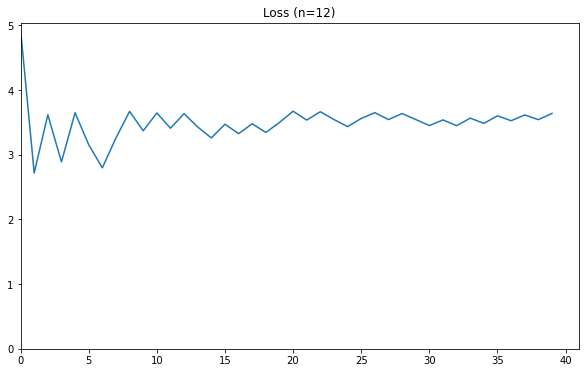

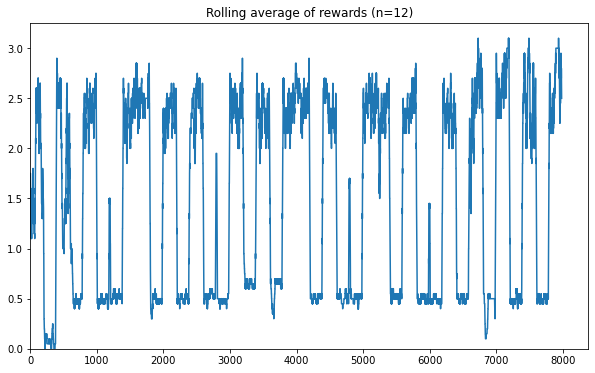

LAYER LENGTH: 16
[18:31:09] Commencement of training.
[18:31:10] Completed epoch 1: 9.451904459567741
[18:31:11] Completed epoch 2: 9.330504410159774
[18:31:12] Completed epoch 3: 9.328205526312813
[18:31:12] Completed epoch 4: 9.307379638666752
[18:31:13] Completed epoch 5: 9.273539251865818
[18:31:14] Completed epoch 6: 9.269802375325623
[18:31:14] Completed epoch 7: 9.280700941757699
[18:31:15] Completed epoch 8: 9.287990567371017
[18:31:16] Completed epoch 9: 8.81748722384723
[18:31:16] Completed epoch 10: 8.84655437288003
[18:31:17] Completed epoch 11: 8.879544648070379
[18:31:18] Completed epoch 12: 8.907203361916185
[18:31:18] Completed epoch 13: 8.925002283788773
[18:31:19] Completed epoch 14: 8.94844791937312
[18:31:20] Completed epoch 15: 8.962451028828434
[18:31:20] Completed epoch 16: 8.986928769456792
[18:31:21] Completed epoch 17: 8.74838024025246
[18:31:22] Completed epoch 18: 8.772827838930509
[18:31:22] Completed epoch 19: 8.800236611199713
[18:31:23] Completed epoch 2

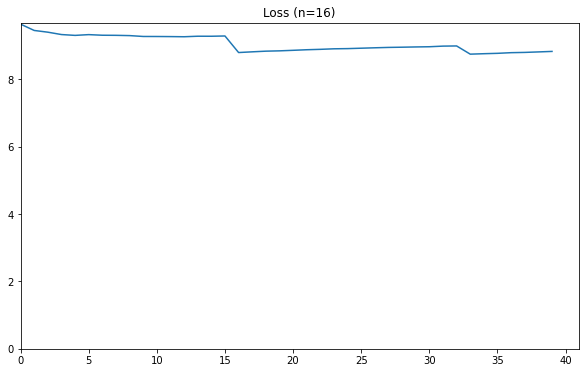

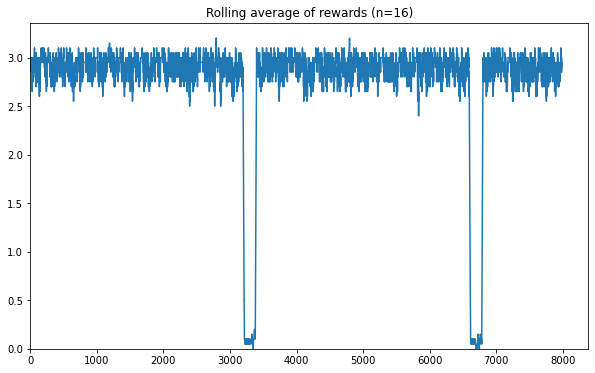

LAYER LENGTH: 20
[18:31:23] Commencement of training.
[18:31:24] Completed epoch 1: 9.388260639235376
[18:31:25] Completed epoch 2: 9.249200945682823
[18:31:25] Completed epoch 3: 9.258472822122275
[18:31:26] Completed epoch 4: 9.248498818511143
[18:31:27] Completed epoch 5: 9.220420504100622
[18:31:27] Completed epoch 6: 9.189314387049526
[18:31:28] Completed epoch 7: 9.174334576454546
[18:31:29] Completed epoch 8: 9.165894761146046
[18:31:29] Completed epoch 9: 8.715639231145373
[18:31:30] Completed epoch 10: 8.758979662219426
[18:31:31] Completed epoch 11: 8.797888777982774
[18:31:31] Completed epoch 12: 8.835984058357147
[18:31:32] Completed epoch 13: 8.867080607393033
[18:31:33] Completed epoch 14: 8.893202296199005
[18:31:33] Completed epoch 15: 8.913350912115469
[18:31:34] Completed epoch 16: 8.924703593031964
[18:31:35] Completed epoch 17: 8.93956546418938
[18:31:35] Completed epoch 18: 8.953225021909917
[18:31:36] Completed epoch 19: 8.974712102335921
[18:31:37] Completed epoc

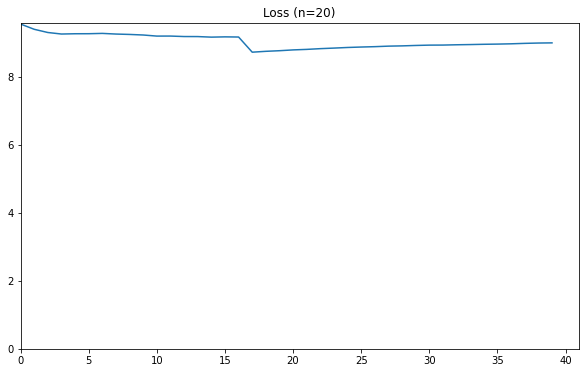

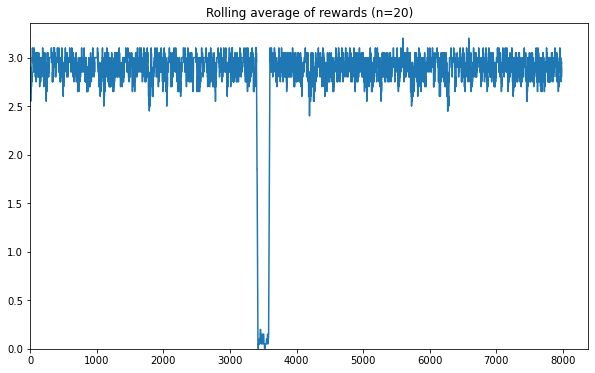

LAYER LENGTH: 24
[18:31:37] Commencement of training.
[18:31:39] Completed epoch 1: 2.864353333072304
[18:31:40] Completed epoch 2: 6.290215916909992
[18:31:41] Completed epoch 3: 6.005169795698567
[18:31:42] Completed epoch 4: 6.8582523467739245
[18:31:43] Completed epoch 5: 7.39310187741914
[18:31:44] Completed epoch 6: 7.759668231182617
[18:31:44] Completed epoch 7: 8.01114419815653
[18:31:45] Completed epoch 8: 8.206626173386962
[18:31:46] Completed epoch 9: 8.350612154121745
[18:31:47] Completed epoch 10: 8.47105093870957
[18:31:48] Completed epoch 11: 8.564364489735972
[18:31:49] Completed epoch 12: 8.642542448924642
[18:31:50] Completed epoch 13: 8.715231491315054
[18:31:51] Completed epoch 14: 8.79378638479255
[18:31:51] Completed epoch 15: 8.844367292473047
[18:31:52] Completed epoch 16: 8.90018808669348
[18:31:53] Completed epoch 17: 8.9440005521821
[18:31:54] Completed epoch 18: 8.97058385483865
[18:31:55] Completed epoch 19: 9.001211020373457
[18:31:56] Completed epoch 20: 

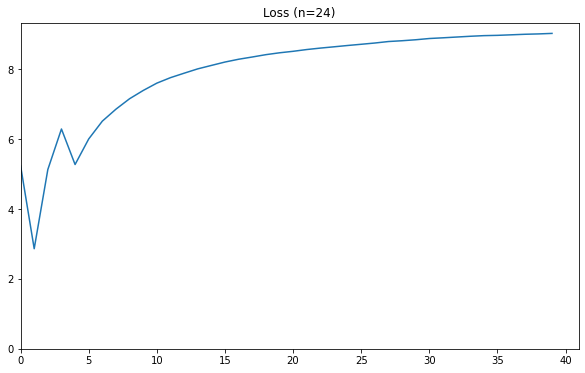

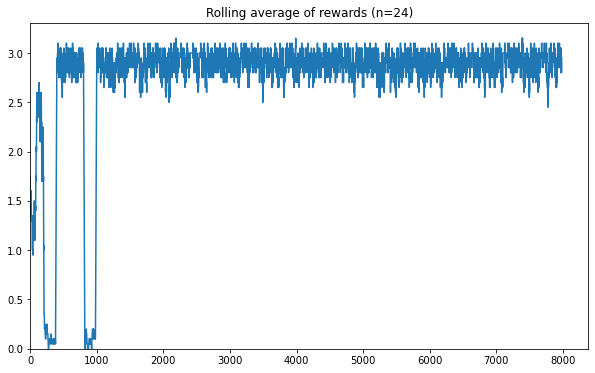

LAYER LENGTH: 28
[18:31:56] Commencement of training.
[18:31:57] Completed epoch 1: 9.541068654321133
[18:31:59] Completed epoch 2: 9.580534327160567
[18:32:00] Completed epoch 3: 9.573689551440378
[18:32:01] Completed epoch 4: 9.554642163580283
[18:32:02] Completed epoch 5: 9.550213730864227
[18:32:03] Completed epoch 6: 9.548511442386856
[18:32:04] Completed epoch 7: 9.538366950617306
[18:32:04] Completed epoch 8: 8.998258581790141
[18:32:05] Completed epoch 9: 9.070396517146794
[18:32:06] Completed epoch 10: 9.128606865432113
[18:32:06] Completed epoch 11: 9.162369877665558
[18:32:07] Completed epoch 12: 9.196339054526762
[18:32:08] Completed epoch 13: 9.218159127255472
[18:32:09] Completed epoch 14: 9.237933475308653
[18:32:09] Completed epoch 15: 9.261237910288076
[18:32:10] Completed epoch 16: 9.28162929089507
[18:32:11] Completed epoch 17: 9.28770992084242
[18:32:11] Completed epoch 18: 9.296448258573397
[18:32:12] Completed epoch 19: 9.308082560753745
[18:32:13] Completed epoch

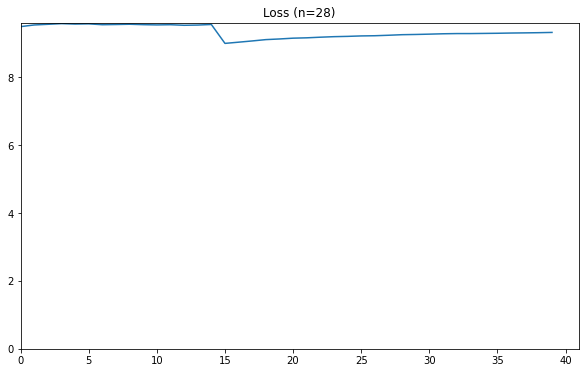

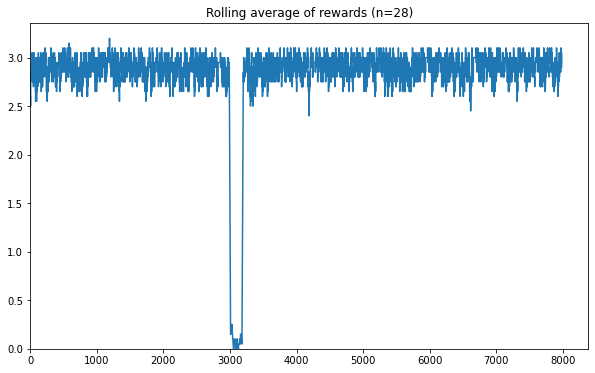

LAYER LENGTH: 32
[18:32:13] Commencement of training.
[18:32:14] Completed epoch 1: 7.930272516198456
[18:32:14] Completed epoch 2: 5.45365283347317
[18:32:15] Completed epoch 3: 4.382932008886758
[18:32:16] Completed epoch 4: 3.751394359489126
[18:32:16] Completed epoch 5: 3.4363612769650964
[18:32:17] Completed epoch 6: 3.3267316082503284
[18:32:18] Completed epoch 7: 3.1136572098931374
[18:32:19] Completed epoch 8: 3.0090600447747256
[18:32:19] Completed epoch 9: 2.89722446244703
[18:32:20] Completed epoch 10: 2.934914247448977
[18:32:21] Completed epoch 11: 2.8479470254746397
[18:32:21] Completed epoch 12: 2.728912090394617
[18:32:22] Completed epoch 13: 2.67491972830194
[18:32:23] Completed epoch 14: 2.6336145624223084
[18:32:23] Completed epoch 15: 2.554530862996521
[18:32:24] Completed epoch 16: 2.561032135797235
[18:32:25] Completed epoch 17: 2.429391137237024
[18:32:25] Completed epoch 18: 2.3520891544905536
[18:32:26] Completed epoch 19: 2.349647279727063
[18:32:27] Completed

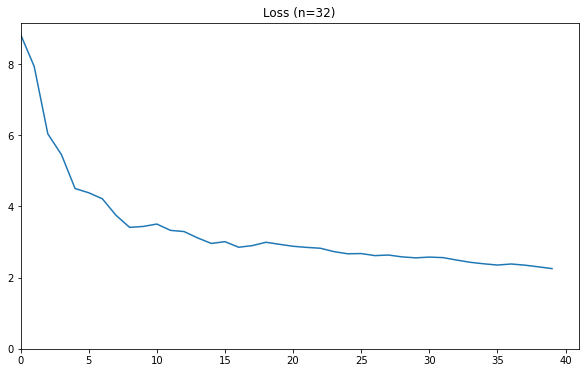

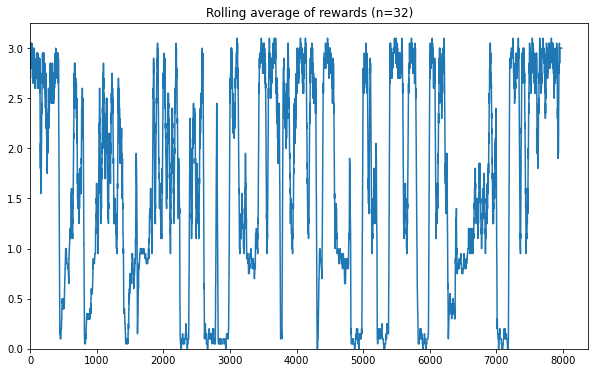

LAYER LENGTH: 36
[18:32:27] Commencement of training.
[18:32:28] Completed epoch 1: 3.062477018042391
[18:32:28] Completed epoch 2: 6.4436144204954235
[18:32:29] Completed epoch 3: 7.481576280330282
[18:32:30] Completed epoch 4: 7.990557210247712
[18:32:30] Completed epoch 5: 8.28294576819817
[18:32:31] Completed epoch 6: 8.508288140165142
[18:32:32] Completed epoch 7: 8.673175548712978
[18:32:32] Completed epoch 8: 8.778091105123856
[18:32:33] Completed epoch 9: 8.855525426776762
[18:32:33] Completed epoch 10: 8.909222884099085
[18:32:34] Completed epoch 11: 8.949748076453714
[18:32:35] Completed epoch 12: 8.988519070082571
[18:32:35] Completed epoch 13: 9.029017603153141
[18:32:36] Completed epoch 14: 9.058909202927918
[18:32:37] Completed epoch 15: 8.793981922732723
[18:32:37] Completed epoch 16: 8.840139302561928
[18:32:38] Completed epoch 17: 8.883072284764168
[18:32:39] Completed epoch 18: 8.689429380055048
[18:32:40] Completed epoch 19: 8.732090991631098
[18:32:40] Completed epo

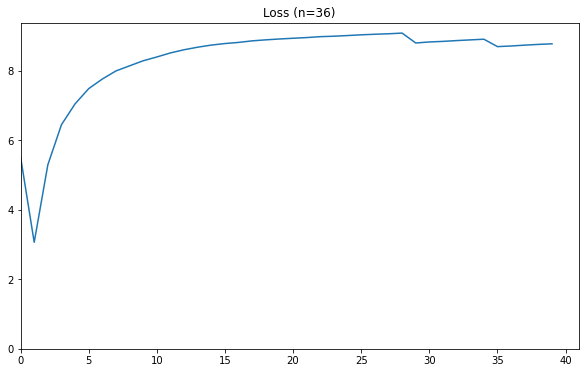

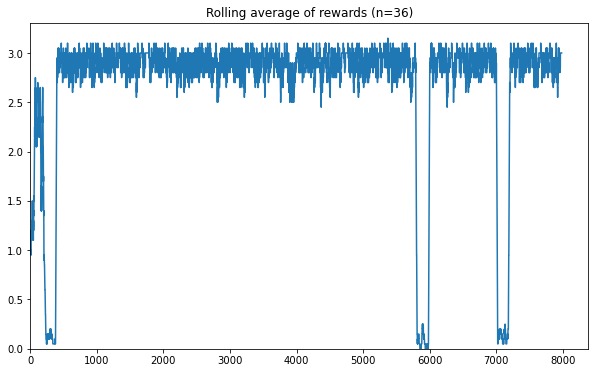

LAYER LENGTH: 40
[18:32:41] Commencement of training.
[18:32:41] Completed epoch 1: 3.3277322016433755
[18:32:42] Completed epoch 2: 3.855302533032882
[18:32:43] Completed epoch 3: 3.975244259780581
[18:32:43] Completed epoch 4: 3.879942525787219
[18:32:44] Completed epoch 5: 3.9141054958125605
[18:32:45] Completed epoch 6: 3.878531732332255
[18:32:45] Completed epoch 7: 3.8587136236396846
[18:32:46] Completed epoch 8: 3.9535559054440976
[18:32:47] Completed epoch 9: 3.807651703954695
[18:32:47] Completed epoch 10: 3.6518800104978855
[18:32:48] Completed epoch 11: 3.3987615061561733
[18:32:49] Completed epoch 12: 3.2003892658902457
[18:32:49] Completed epoch 13: 3.1666479334585405
[18:32:50] Completed epoch 14: 3.0190623680466695
[18:32:51] Completed epoch 15: 2.9421654857454413
[18:32:52] Completed epoch 16: 2.890191006795206
[18:32:53] Completed epoch 17: 2.841885200908286
[18:32:53] Completed epoch 18: 2.840503508013999
[18:32:54] Completed epoch 19: 2.758922485197309
[18:32:55] Com

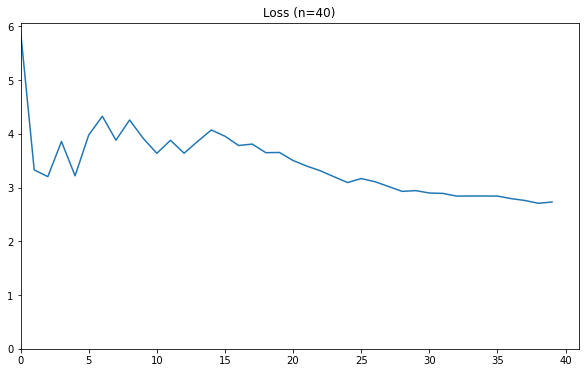

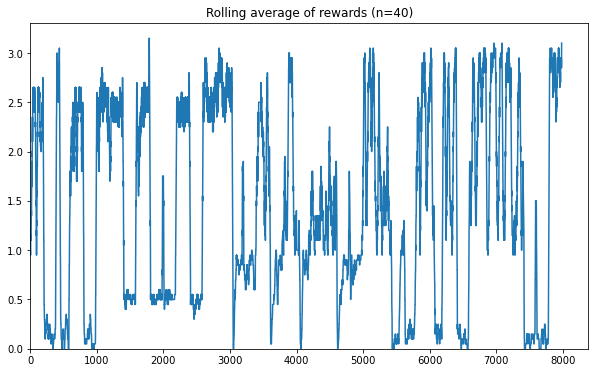

LAYER LENGTH: 44
[18:32:55] Commencement of training.
[18:32:56] Completed epoch 1: 3.361350484270106
[18:32:57] Completed epoch 2: 3.851270299636976
[18:32:57] Completed epoch 3: 3.8088913895282017
[18:32:58] Completed epoch 4: 3.9137911628197686
[18:32:59] Completed epoch 5: 4.845536049880966
[18:32:59] Completed epoch 6: 5.4175255566283935
[18:33:00] Completed epoch 7: 5.408173730876924
[18:33:01] Completed epoch 8: 5.2931740716308955
[18:33:01] Completed epoch 9: 5.198896436471392
[18:33:02] Completed epoch 10: 5.158169517906851
[18:33:03] Completed epoch 11: 5.094850132320164
[18:33:04] Completed epoch 12: 5.005025629527084
[18:33:04] Completed epoch 13: 5.005976843719077
[18:33:05] Completed epoch 14: 4.950275225874463
[18:33:06] Completed epoch 15: 4.907787674745721
[18:33:06] Completed epoch 16: 4.8878679750832745
[18:33:07] Completed epoch 17: 4.851926415802233
[18:33:08] Completed epoch 18: 4.881093710808776
[18:33:09] Completed epoch 19: 4.836045793411439
[18:33:10] Complete

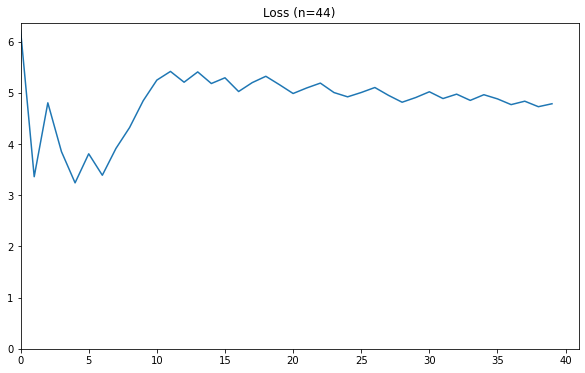

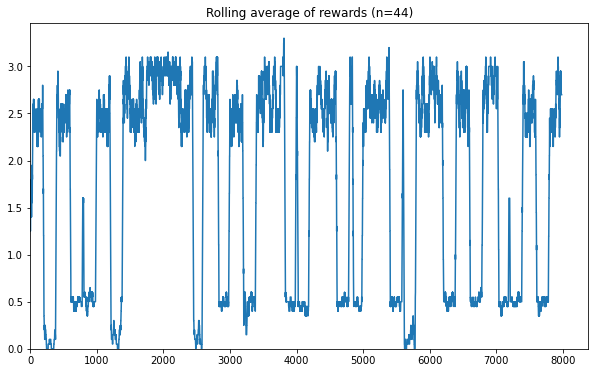

LAYER LENGTH: 48
[18:33:10] Commencement of training.
[18:33:11] Completed epoch 1: 9.67393529304769
[18:33:11] Completed epoch 2: 9.576967646523844
[18:33:12] Completed epoch 3: 9.552978431015896
[18:33:13] Completed epoch 4: 9.563483823261922
[18:33:13] Completed epoch 5: 9.548287058609537
[18:33:14] Completed epoch 6: 8.821072548841281
[18:33:15] Completed epoch 7: 8.936276470435384
[18:33:16] Completed epoch 8: 9.004241911630961
[18:33:16] Completed epoch 9: 8.580715032560855
[18:33:17] Completed epoch 10: 8.67339352930477
[18:33:18] Completed epoch 11: 8.75740320845888
[18:33:18] Completed epoch 12: 8.818452941087308
[18:33:19] Completed epoch 13: 8.538379637926745
[18:33:20] Completed epoch 14: 8.620638235217692
[18:33:21] Completed epoch 15: 8.679429019536512
[18:33:22] Completed epoch 16: 8.73587095581548
[18:33:22] Completed epoch 17: 8.77626089959104
[18:33:23] Completed epoch 18: 8.815635294058206
[18:33:24] Completed epoch 19: 8.853233436476193
[18:33:25] Completed epoch 20

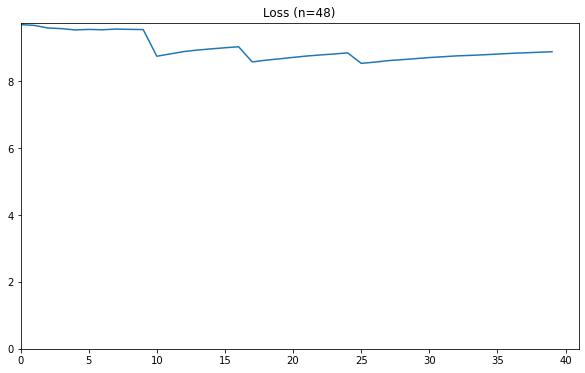

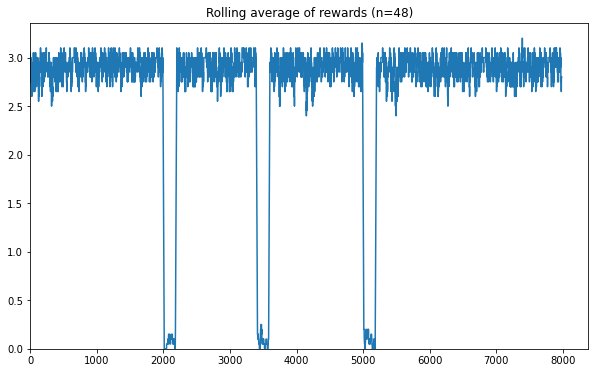

LAYER LENGTH: 52
[18:33:25] Commencement of training.
[18:33:26] Completed epoch 1: 6.072734271666313
[18:33:26] Completed epoch 2: 7.760117135833156
[18:33:27] Completed epoch 3: 8.418411423888772
[18:33:28] Completed epoch 4: 8.693808567916578
[18:33:29] Completed epoch 5: 8.857046854333262
[18:33:29] Completed epoch 6: 8.979622378611053
[18:33:30] Completed epoch 7: 9.058962038809474
[18:33:31] Completed epoch 8: 8.596591783958289
[18:33:32] Completed epoch 9: 8.720026030185146
[18:33:32] Completed epoch 10: 8.80702342716663
[18:33:33] Completed epoch 11: 8.864566751969663
[18:33:34] Completed epoch 12: 8.928352855972191
[18:33:35] Completed epoch 13: 8.977518020897408
[18:33:35] Completed epoch 14: 9.03501673369045
[18:33:36] Completed epoch 15: 9.06234895144442
[18:33:37] Completed epoch 16: 9.086733391979145
[18:33:38] Completed epoch 17: 9.104866721862724
[18:33:38] Completed epoch 18: 9.112374126203683
[18:33:39] Completed epoch 19: 9.137907066929806
[18:33:40] Completed epoch 

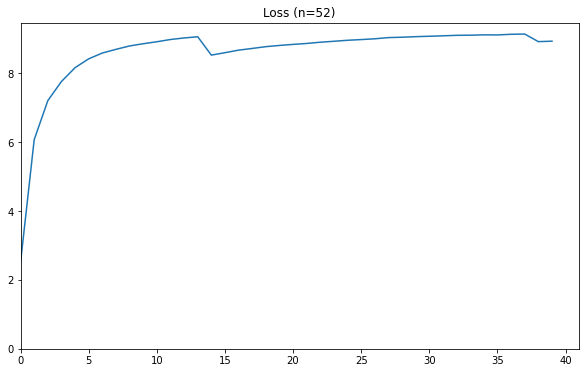

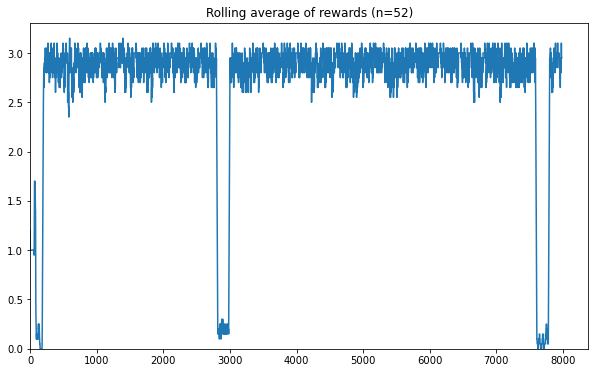

LAYER LENGTH: 56
[18:33:40] Commencement of training.
[18:33:41] Completed epoch 1: 9.375176115236245
[18:33:42] Completed epoch 2: 9.272213271904038
[18:33:42] Completed epoch 3: 9.225446773557147
[18:33:43] Completed epoch 4: 9.25903249290459
[18:33:44] Completed epoch 5: 9.2537438345899
[18:33:45] Completed epoch 6: 9.249750203671331
[18:33:45] Completed epoch 7: 9.248945979013849
[18:33:46] Completed epoch 8: 9.226295249653813
[18:33:47] Completed epoch 9: 9.222987482999613
[18:33:48] Completed epoch 10: 9.230263297295808
[18:33:48] Completed epoch 11: 9.247624624492039
[18:33:49] Completed epoch 12: 9.270322572451034
[18:33:50] Completed epoch 13: 9.307413143800956
[18:33:51] Completed epoch 14: 9.311648066033767
[18:33:51] Completed epoch 15: 9.305731483921928
[18:33:52] Completed epoch 16: 9.297015354172814
[18:33:53] Completed epoch 17: 9.290488185536793
[18:33:54] Completed epoch 18: 9.287488595591256
[18:33:54] Completed epoch 19: 9.280642893232423
[18:33:55] Completed epoch 

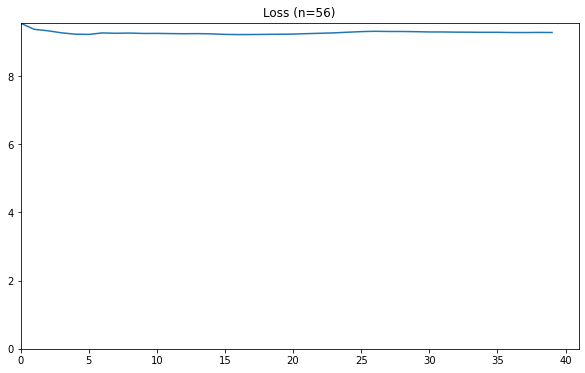

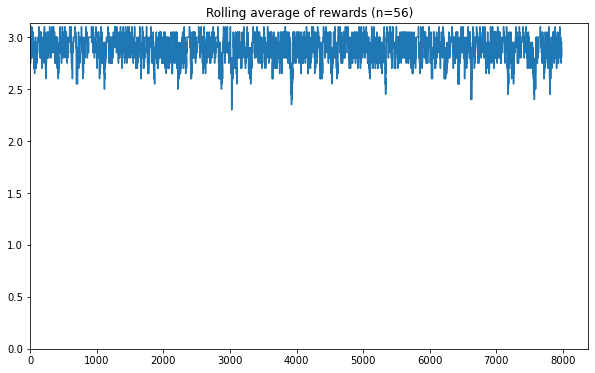

LAYER LENGTH: 60
[18:33:55] Commencement of training.
[18:33:56] Completed epoch 1: 2.8591236369579565
[18:33:57] Completed epoch 2: 3.358294182039681
[18:33:58] Completed epoch 3: 3.6974317173166975
[18:33:58] Completed epoch 4: 3.4426376453609553
[18:33:59] Completed epoch 5: 3.939885448766232
[18:34:00] Completed epoch 6: 3.9093234016002922
[18:34:01] Completed epoch 7: 3.8307240978605925
[18:34:01] Completed epoch 8: 3.9227054151085925
[18:34:02] Completed epoch 9: 3.7718959310439644
[18:34:03] Completed epoch 10: 3.5984787356669994
[18:34:04] Completed epoch 11: 3.483846837047483
[18:34:04] Completed epoch 12: 3.322074291884249
[18:34:05] Completed epoch 13: 3.2673538202229024
[18:34:06] Completed epoch 14: 3.1601892441959563
[18:34:07] Completed epoch 15: 3.0417968742566597
[18:34:07] Completed epoch 16: 2.98830736354486
[18:34:08] Completed epoch 17: 2.8793838836602412
[18:34:09] Completed epoch 18: 2.7423170451421766
[18:34:09] Completed epoch 19: 2.6657027967485254
[18:34:10] 

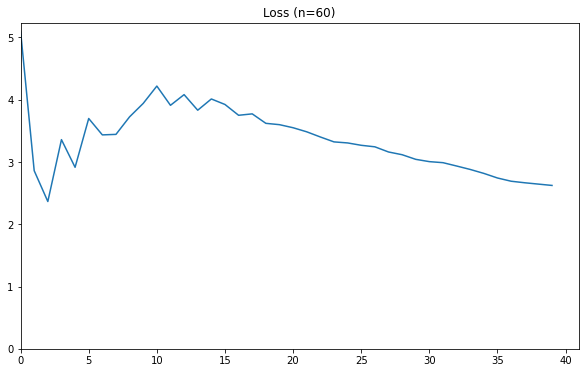

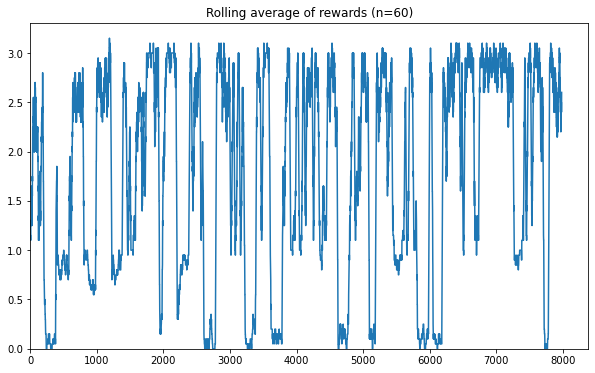

LAYER LENGTH: 64
[18:34:11] Commencement of training.
[18:34:11] Completed epoch 1: 9.59560617685318
[18:34:12] Completed epoch 2: 9.54155308842659
[18:34:13] Completed epoch 3: 9.588535392284394
[18:34:13] Completed epoch 4: 9.582026544213296
[18:34:14] Completed epoch 5: 9.590621235370635
[18:34:15] Completed epoch 6: 9.59135102947553
[18:34:16] Completed epoch 7: 9.605443739550454
[18:34:16] Completed epoch 8: 9.604138272106647
[18:34:17] Completed epoch 9: 9.598956241872575
[18:34:18] Completed epoch 10: 9.606560617685318
[18:34:19] Completed epoch 11: 9.599146016077562
[18:34:19] Completed epoch 12: 9.586300514737765
[18:34:20] Completed epoch 13: 9.571777398219476
[18:34:21] Completed epoch 14: 9.56932901263237
[18:34:22] Completed epoch 15: 9.56820707845688
[18:34:23] Completed epoch 16: 9.570819136053323
[18:34:23] Completed epoch 17: 9.336212128050187
[18:34:24] Completed epoch 18: 9.349061454269622
[18:34:25] Completed epoch 19: 9.350821377729115
[18:34:26] Completed epoch 20

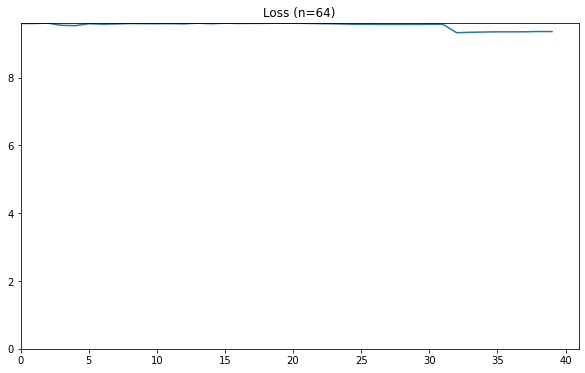

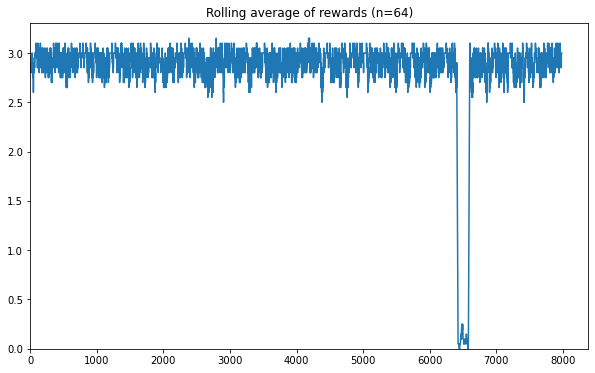

LAYER LENGTH: 68
[18:34:26] Commencement of training.
[18:34:27] Completed epoch 1: 5.317670433167368
[18:34:28] Completed epoch 2: 7.330085216583684
[18:34:29] Completed epoch 3: 8.087556811055789
[18:34:29] Completed epoch 4: 8.449417608291842
[18:34:30] Completed epoch 5: 8.686534086633474
[18:34:31] Completed epoch 6: 8.827111738861229
[18:34:32] Completed epoch 7: 8.925381490452482
[18:34:33] Completed epoch 8: 9.01814630414592
[18:34:33] Completed epoch 9: 9.076407825907486
[18:34:34] Completed epoch 10: 9.132017043316736
[18:34:35] Completed epoch 11: 9.175924584833398
[18:34:36] Completed epoch 12: 9.20959753609728
[18:34:37] Completed epoch 13: 9.238090033320567
[18:34:37] Completed epoch 14: 9.25144074522624
[18:34:38] Completed epoch 15: 9.264178028877824
[18:34:39] Completed epoch 16: 9.28219815207296
[18:34:40] Completed epoch 17: 9.294715907833375
[18:34:41] Completed epoch 18: 9.08973169073152
[18:34:41] Completed epoch 19: 9.10856160174565
[18:34:42] Completed epoch 20:

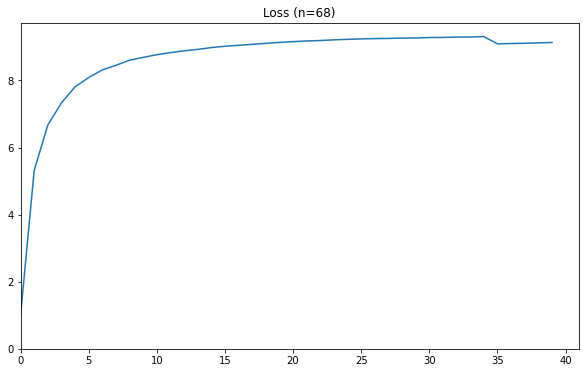

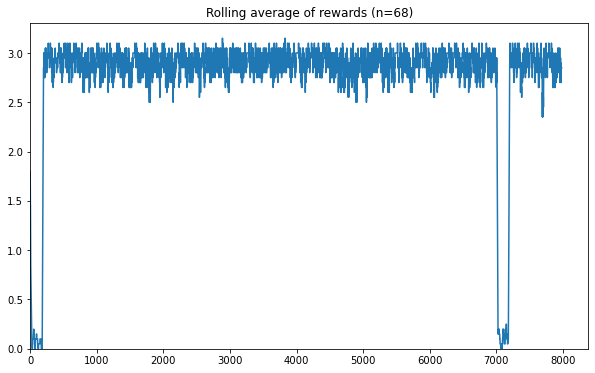

LAYER LENGTH: 72
[18:34:43] Commencement of training.
[18:34:43] Completed epoch 1: 5.045207140445709
[18:34:44] Completed epoch 2: 7.283853570222854
[18:34:45] Completed epoch 3: 8.03840238014857
[18:34:46] Completed epoch 4: 8.392551785111428
[18:34:46] Completed epoch 5: 8.589041428089143
[18:34:47] Completed epoch 6: 8.745451190074284
[18:34:48] Completed epoch 7: 8.861101020063673
[18:34:49] Completed epoch 8: 8.938463392555713
[18:34:49] Completed epoch 9: 9.000578571160634
[18:34:50] Completed epoch 10: 9.05327071404457
[18:34:51] Completed epoch 11: 9.1084279218587
[18:34:52] Completed epoch 12: 9.150225595037142
[18:34:53] Completed epoch 13: 9.188862087726593
[18:34:53] Completed epoch 14: 9.21840765288898
[18:34:54] Completed epoch 15: 9.23584714269638
[18:34:55] Completed epoch 16: 9.264387946277857
[18:34:56] Completed epoch 17: 9.286776890614453
[18:34:57] Completed epoch 18: 9.305567063358096
[18:34:58] Completed epoch 19: 9.320274060023458
[18:34:58] Completed epoch 20:

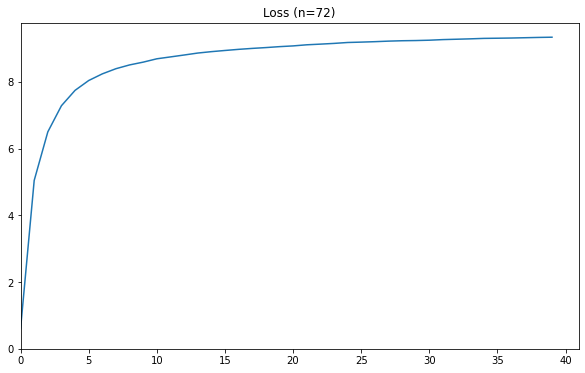

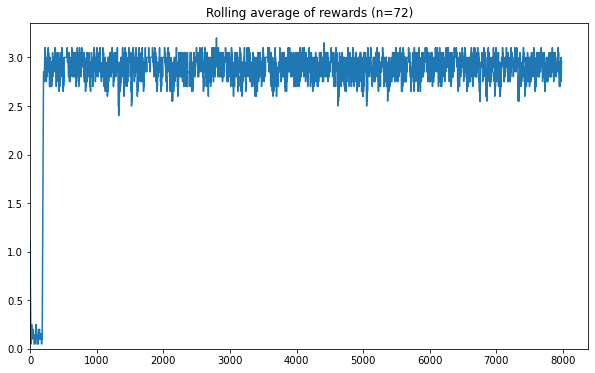

LAYER LENGTH: 76
[18:34:59] Commencement of training.
[18:34:59] Completed epoch 1: 9.705421270281077
[18:35:00] Completed epoch 2: 9.49445999165997
[18:35:01] Completed epoch 3: 9.40756764187167
[18:35:02] Completed epoch 4: 9.343011693982408
[18:35:03] Completed epoch 5: 9.337207865618169
[18:35:03] Completed epoch 6: 9.323809494568655
[18:35:04] Completed epoch 7: 9.309267503680395
[18:35:05] Completed epoch 8: 9.296271081583109
[18:35:06] Completed epoch 9: 9.27007153287323
[18:35:07] Completed epoch 10: 9.271148869765922
[18:35:07] Completed epoch 11: 9.269011169331657
[18:35:08] Completed epoch 12: 9.285135238554018
[18:35:09] Completed epoch 13: 9.305894066357554
[18:35:10] Completed epoch 14: 8.995830204474872
[18:35:11] Completed epoch 15: 9.040941524176548
[18:35:12] Completed epoch 16: 9.079788928915514
[18:35:12] Completed epoch 17: 9.115683697802837
[18:35:13] Completed epoch 18: 9.13925682570268
[18:35:14] Completed epoch 19: 9.151138045402538
[18:35:15] Completed epoch 2

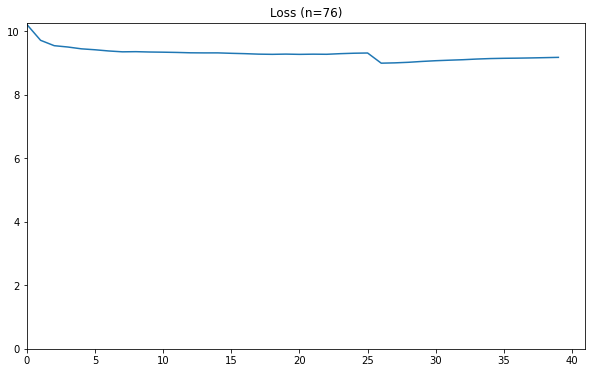

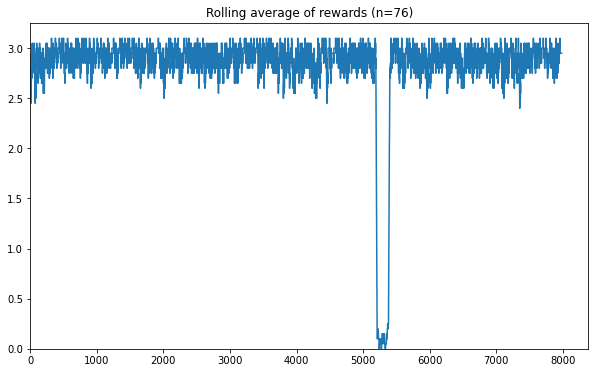

LAYER LENGTH: 80
[18:35:15] Commencement of training.
[18:35:16] Completed epoch 1: 9.363192905826473
[18:35:17] Completed epoch 2: 6.814874297106918
[18:35:17] Completed epoch 3: 5.65050122170557
[18:35:18] Completed epoch 4: 5.08017669237554
[18:35:19] Completed epoch 5: 4.70143248207392
[18:35:20] Completed epoch 6: 4.5059789200358376
[18:35:21] Completed epoch 7: 4.021098566903649
[18:35:21] Completed epoch 8: 3.6664740358603156
[18:35:22] Completed epoch 9: 3.4242106417685925
[18:35:23] Completed epoch 10: 3.148720843559813
[18:35:24] Completed epoch 11: 3.076266203993373
[18:35:25] Completed epoch 12: 2.9084127219569336
[18:35:26] Completed epoch 13: 2.7993403241523893
[18:35:27] Completed epoch 14: 2.7627614660920763
[18:35:27] Completed epoch 15: 2.651019821826896
[18:35:28] Completed epoch 16: 2.5458385398353163
[18:35:29] Completed epoch 17: 2.5093204132503626
[18:35:30] Completed epoch 18: 2.448588688651725
[18:35:31] Completed epoch 19: 2.3503906485974904
[18:35:32] Complet

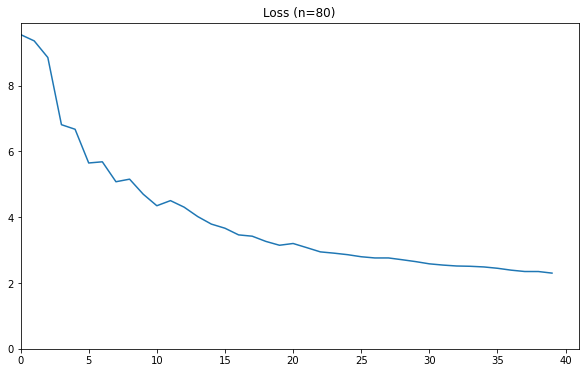

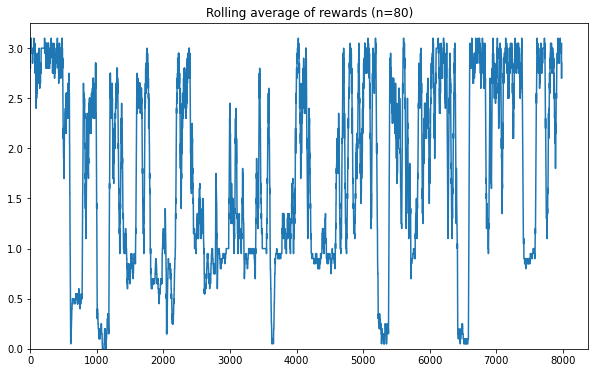

LAYER LENGTH: 84
[18:35:32] Commencement of training.
[18:35:33] Completed epoch 1: 5.261494322009384
[18:35:34] Completed epoch 2: 7.301997161004692
[18:35:34] Completed epoch 3: 8.045498107336462
[18:35:35] Completed epoch 4: 8.413498580502345
[18:35:36] Completed epoch 5: 8.656298864401878
[18:35:37] Completed epoch 6: 8.798582387001565
[18:35:38] Completed epoch 7: 8.90914204600134
[18:35:39] Completed epoch 8: 9.025186790251173
[18:35:39] Completed epoch 9: 9.085721591334377
[18:35:40] Completed epoch 10: 9.140399432200939
[18:35:41] Completed epoch 11: 9.167181302000854
[18:35:42] Completed epoch 12: 9.222832860167449
[18:35:43] Completed epoch 13: 9.270307255539183
[18:35:44] Completed epoch 14: 9.303856737286385
[18:35:45] Completed epoch 15: 9.321932954800626
[18:35:46] Completed epoch 16: 9.332124645125587
[18:35:46] Completed epoch 17: 9.354499666000551
[18:35:47] Completed epoch 18: 9.1239719067783
[18:35:48] Completed epoch 19: 9.149289174842599
[18:35:49] Completed epoch 

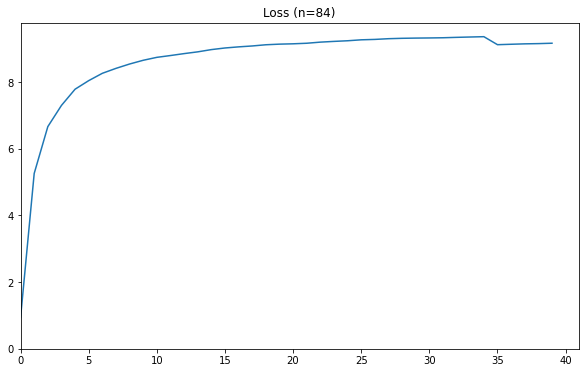

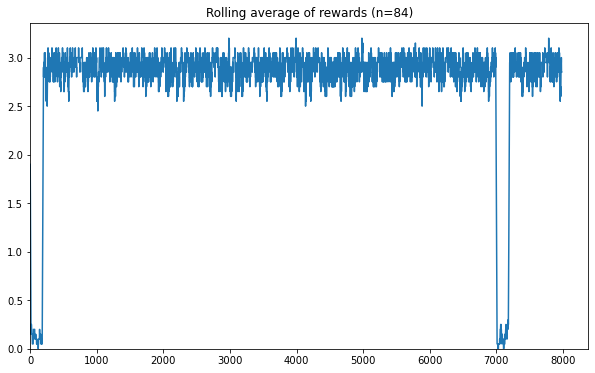

LAYER LENGTH: 88
[18:35:49] Commencement of training.
[18:35:50] Completed epoch 1: 9.7075
[18:35:51] Completed epoch 2: 9.63375
[18:35:52] Completed epoch 3: 9.626666666666667
[18:35:52] Completed epoch 4: 9.611875
[18:35:53] Completed epoch 5: 9.5825
[18:35:54] Completed epoch 6: 9.5725
[18:35:54] Completed epoch 7: 9.571751585347311
[18:35:55] Completed epoch 8: 9.556532637178897
[18:35:56] Completed epoch 9: 9.56775123304791
[18:35:57] Completed epoch 10: 9.556226109743118
[18:35:58] Completed epoch 11: 9.158387372493744
[18:35:58] Completed epoch 12: 9.1774800914526
[18:35:59] Completed epoch 13: 9.212289315187014
[18:36:00] Completed epoch 14: 9.238197221245084
[18:36:01] Completed epoch 15: 9.262984073162079
[18:36:01] Completed epoch 16: 9.288266318589448
[18:36:02] Completed epoch 17: 9.302780064554776
[18:36:03] Completed epoch 18: 9.319847838746178
[18:36:04] Completed epoch 19: 9.331303215654273
[18:36:05] Completed epoch 20: 9.341613054871559


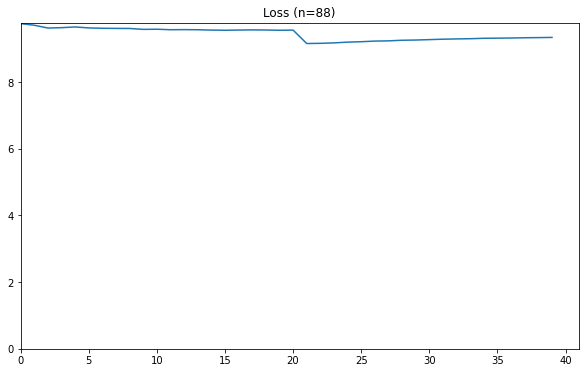

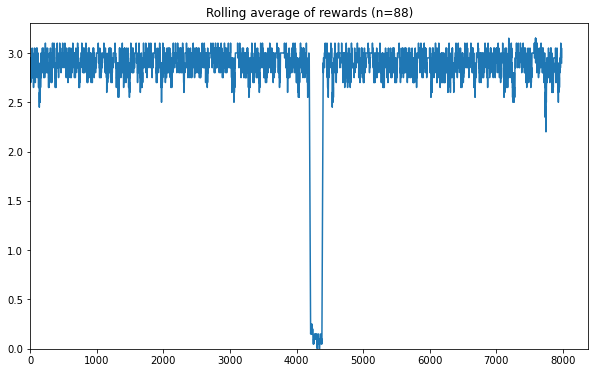

LAYER LENGTH: 92
[18:36:05] Commencement of training.
[18:36:06] Completed epoch 1: 5.866858936101198
[18:36:07] Completed epoch 2: 7.664679468050599
[18:36:08] Completed epoch 3: 8.298119645367066
[18:36:09] Completed epoch 4: 8.5892147340253
[18:36:10] Completed epoch 5: 8.77787178722024
[18:36:11] Completed epoch 6: 8.899893156016866
[18:36:12] Completed epoch 7: 8.992408419443029
[18:36:13] Completed epoch 8: 8.58241986701265
[18:36:14] Completed epoch 9: 8.681595437344578
[18:36:15] Completed epoch 10: 8.77268589361012
[18:36:16] Completed epoch 11: 8.830623539645563
[18:36:17] Completed epoch 12: 8.899321578008433
[18:36:17] Completed epoch 13: 8.94668145662317
[18:36:18] Completed epoch 14: 8.9919184954358
[18:36:19] Completed epoch 15: 9.032957262406747
[18:36:20] Completed epoch 16: 9.058553683506325
[18:36:21] Completed epoch 17: 9.092756408005952
[18:36:22] Completed epoch 18: 9.117464385338955
[18:36:23] Completed epoch 19: 9.151939944005326
[18:36:24] Completed epoch 20: 9

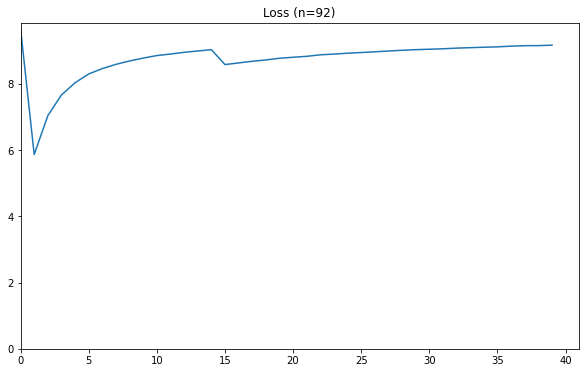

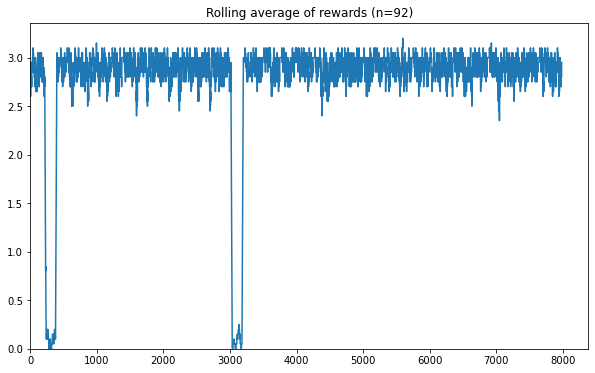

LAYER LENGTH: 96
[18:36:24] Commencement of training.
[18:36:25] Completed epoch 1: 4.154251988984761
[18:36:25] Completed epoch 2: 5.167644025612681
[18:36:26] Completed epoch 3: 6.656421363703945
[18:36:27] Completed epoch 4: 7.409816022777959
[18:36:28] Completed epoch 5: 7.823352818222367
[18:36:29] Completed epoch 6: 8.119044015185306
[18:36:30] Completed epoch 7: 8.344894870158834
[18:36:30] Completed epoch 8: 8.48428301138898
[18:36:31] Completed epoch 9: 8.594640454567982
[18:36:32] Completed epoch 10: 8.683676409111184
[18:36:33] Completed epoch 11: 8.779024008282894
[18:36:34] Completed epoch 12: 8.48931367425932
[18:36:35] Completed epoch 13: 8.568404930085526
[18:36:36] Completed epoch 14: 8.645126006507988
[18:36:37] Completed epoch 15: 8.700617606074122
[18:36:38] Completed epoch 16: 8.74792275569449
[18:36:39] Completed epoch 17: 8.796574358300695
[18:36:40] Completed epoch 18: 8.834681338395102
[18:36:41] Completed epoch 19: 8.869698110058518
[18:36:42] Completed epoch 

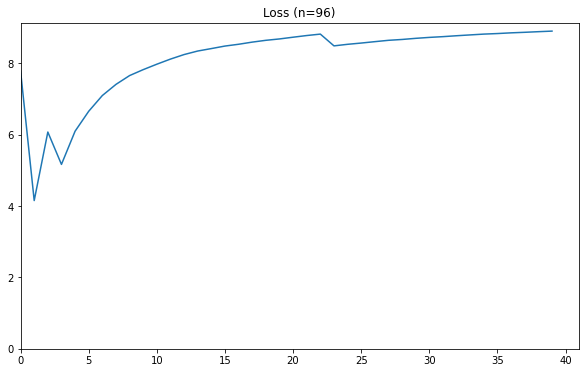

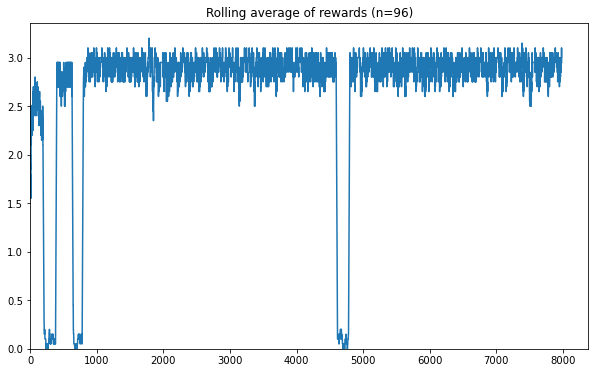

LAYER LENGTH: 100
[18:36:42] Commencement of training.
[18:36:43] Completed epoch 1: 9.600472922325133
[18:36:44] Completed epoch 2: 9.618986461162567
[18:36:45] Completed epoch 3: 9.615157640775045
[18:36:45] Completed epoch 4: 9.586368230581284
[18:36:46] Completed epoch 5: 9.636594584465026
[18:36:47] Completed epoch 6: 9.617578820387523
[18:36:48] Completed epoch 7: 9.614353274617876
[18:36:49] Completed epoch 8: 9.610059115290642
[18:36:50] Completed epoch 9: 9.599219213591681
[18:36:51] Completed epoch 10: 9.598547292232514
[18:36:51] Completed epoch 11: 9.604588447484103
[18:36:52] Completed epoch 12: 9.606289410193762
[18:36:53] Completed epoch 13: 9.605228686332703
[18:36:54] Completed epoch 14: 9.58878378016608
[18:36:55] Completed epoch 15: 9.60053152815501
[18:36:56] Completed epoch 16: 9.59721705764532
[18:36:57] Completed epoch 17: 9.599586642489713
[18:36:58] Completed epoch 18: 9.597942940129174
[18:36:58] Completed epoch 19: 9.594761732753954
[18:36:59] Completed epoch

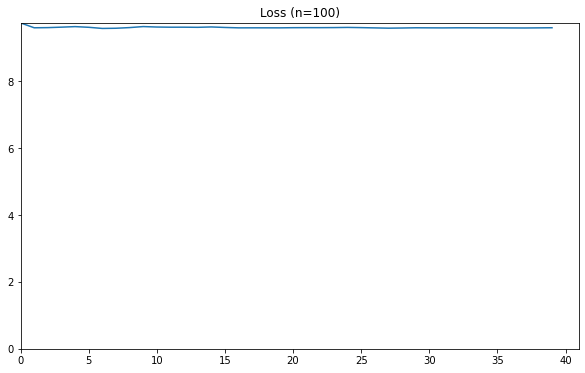

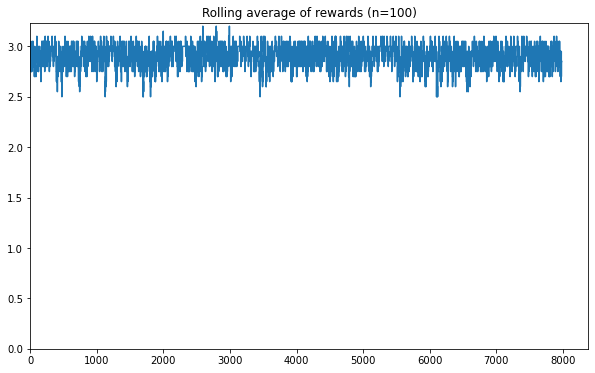

LAYER LENGTH: 104
[18:37:00] Commencement of training.
[18:37:00] Completed epoch 1: 9.682728928774596
[18:37:01] Completed epoch 2: 9.643506037816405
[18:37:02] Completed epoch 3: 9.610670691877603
[18:37:03] Completed epoch 4: 9.597378018908202
[18:37:04] Completed epoch 5: 9.581902415126562
[18:37:05] Completed epoch 6: 9.594085345938801
[18:37:06] Completed epoch 7: 9.583144582233258
[18:37:07] Completed epoch 8: 9.574939009454102
[18:37:08] Completed epoch 9: 9.574668008403645
[18:37:09] Completed epoch 10: 9.57420120756328
[18:37:10] Completed epoch 11: 9.568137461421165
[18:37:11] Completed epoch 12: 9.575792672969401
[18:37:12] Completed epoch 13: 9.570924005817908
[18:37:13] Completed epoch 14: 9.569429433973772
[18:37:14] Completed epoch 15: 9.57413413837552
[18:37:15] Completed epoch 16: 9.578563254727051
[18:37:17] Completed epoch 17: 9.5812948279784
[18:37:18] Completed epoch 18: 9.575667337535156
[18:37:19] Completed epoch 19: 9.567869056612253
[18:37:20] Completed epoch 

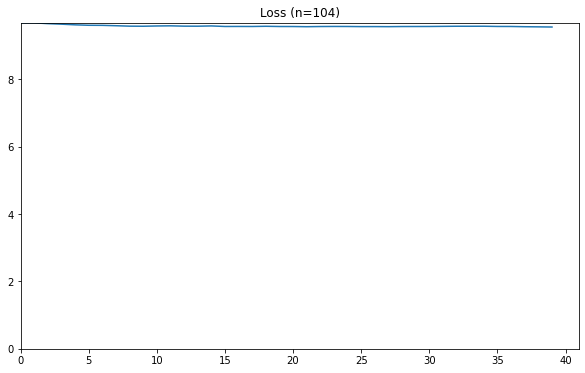

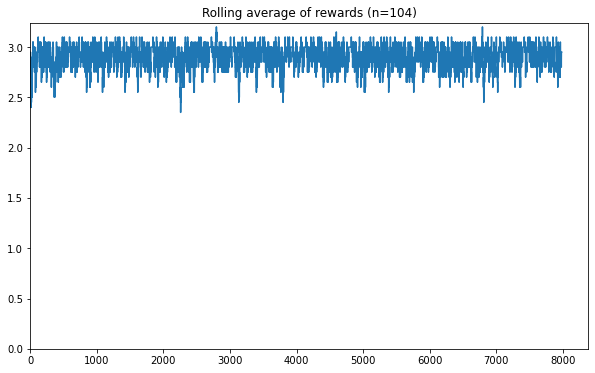

LAYER LENGTH: 108
[18:37:20] Commencement of training.
[18:37:21] Completed epoch 1: 9.779782272051088
[18:37:22] Completed epoch 2: 7.519891136025544
[18:37:23] Completed epoch 3: 8.209094090683696
[18:37:24] Completed epoch 4: 8.506195568012773
[18:37:25] Completed epoch 5: 7.821956454410218
[18:37:26] Completed epoch 6: 8.130797045341849
[18:37:27] Completed epoch 7: 8.311397467435869
[18:37:28] Completed epoch 8: 8.464660284006387
[18:37:29] Completed epoch 9: 8.566642474672344
[18:37:30] Completed epoch 10: 8.65197822720511
[18:37:31] Completed epoch 11: 8.741116570186463
[18:37:32] Completed epoch 12: 8.81706518933759
[18:37:33] Completed epoch 13: 8.864983251696238
[18:37:34] Completed epoch 14: 8.926413019432221
[18:37:35] Completed epoch 15: 8.965652151470072
[18:37:36] Completed epoch 16: 9.006236392003194
[18:37:37] Completed epoch 17: 9.03586954541477
[18:37:39] Completed epoch 18: 8.841099015113949
[18:37:40] Completed epoch 19: 8.868014856423741
[18:37:41] Completed epoch

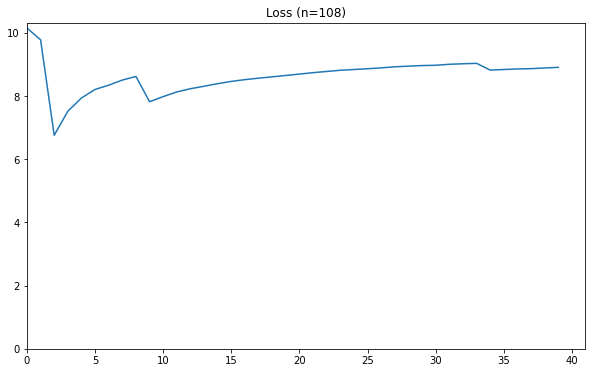

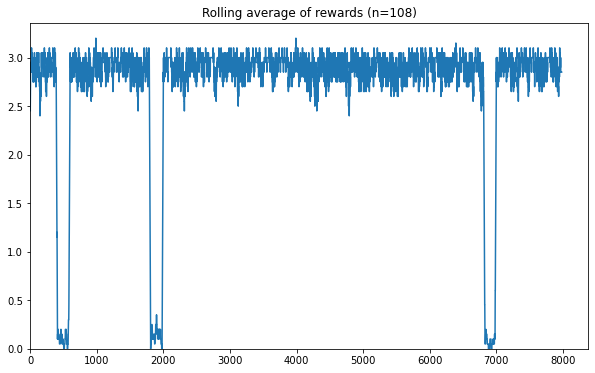

LAYER LENGTH: 112
[18:37:41] Commencement of training.
[18:37:42] Completed epoch 1: 10.169429132579825
[18:37:43] Completed epoch 2: 9.808464566289913
[18:37:44] Completed epoch 3: 9.792309710859941
[18:37:45] Completed epoch 4: 9.772357283144956
[18:37:46] Completed epoch 5: 9.710385826515965
[18:37:47] Completed epoch 6: 9.681154855429972
[18:37:48] Completed epoch 7: 9.13313273322569
[18:37:49] Completed epoch 8: 9.207158384874347
[18:37:50] Completed epoch 9: 9.220251897666087
[18:37:51] Completed epoch 10: 9.242976707899476
[18:37:52] Completed epoch 11: 9.264751552635888
[18:37:53] Completed epoch 12: 9.293313923249565
[18:37:55] Completed epoch 13: 9.322866698384214
[18:37:56] Completed epoch 14: 9.340697648499626
[18:37:57] Completed epoch 15: 9.361484471932984
[18:37:58] Completed epoch 16: 9.375766692437173
[18:37:59] Completed epoch 17: 9.37954512229381
[18:38:00] Completed epoch 18: 9.385542615499709
[18:38:01] Completed epoch 19: 9.388408793631303
[18:38:02] Completed epo

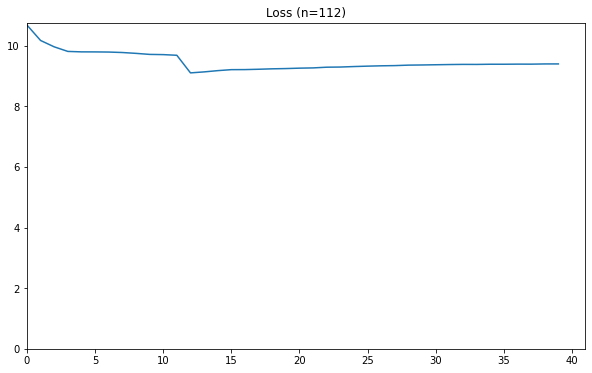

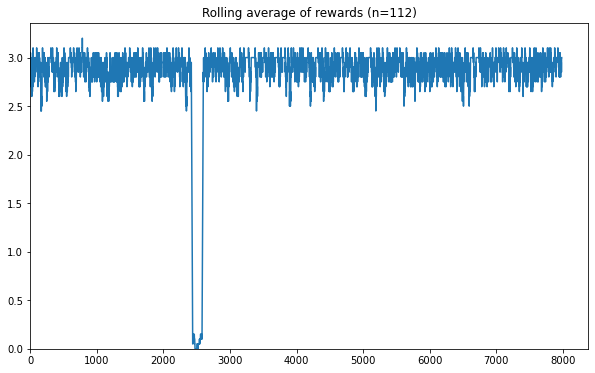

LAYER LENGTH: 116
[18:38:03] Commencement of training.
[18:38:03] Completed epoch 1: 9.508351843357087
[18:38:04] Completed epoch 2: 9.516675921678543
[18:38:05] Completed epoch 3: 9.556117281119029
[18:38:06] Completed epoch 4: 9.577712960839271
[18:38:07] Completed epoch 5: 9.544670368671417
[18:38:08] Completed epoch 6: 9.562641973892848
[18:38:09] Completed epoch 7: 9.548335977622441
[18:38:10] Completed epoch 8: 9.537918980419636
[18:38:11] Completed epoch 9: 9.55731687148412
[18:38:12] Completed epoch 10: 9.55658518433571
[18:38:13] Completed epoch 11: 9.555759258487008
[18:38:13] Completed epoch 12: 9.551320986946424
[18:38:15] Completed epoch 13: 9.548527064873621
[18:38:16] Completed epoch 14: 9.545060845954078
[18:38:17] Completed epoch 15: 9.545390122890472
[18:38:17] Completed epoch 16: 9.546771990209818
[18:38:18] Completed epoch 17: 9.547844226079828
[18:38:19] Completed epoch 18: 9.547130657964283
[18:38:20] Completed epoch 19: 9.538992202281952
[18:38:21] Completed epoc

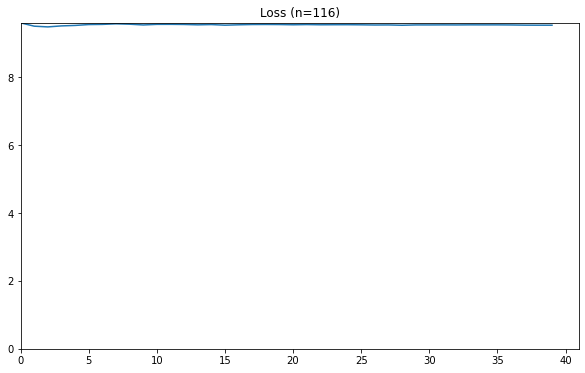

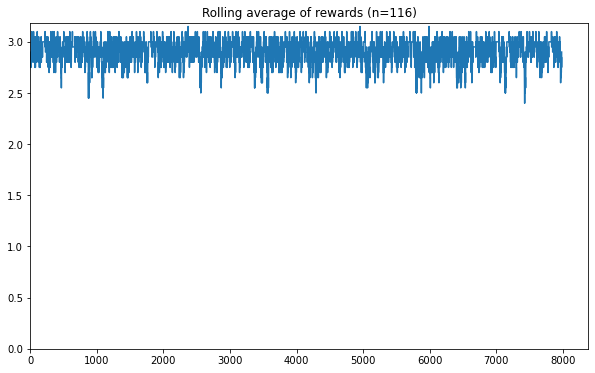

LAYER LENGTH: 120
[18:38:21] Commencement of training.
[18:38:22] Completed epoch 1: 9.739676837167936
[18:38:23] Completed epoch 2: 9.709838418583967
[18:38:24] Completed epoch 3: 9.632392279055978
[18:38:25] Completed epoch 4: 8.498044209291983
[18:38:26] Completed epoch 5: 8.691935367433587
[18:38:28] Completed epoch 6: 8.10869613952799
[18:38:29] Completed epoch 7: 8.31816811959542
[18:38:30] Completed epoch 8: 8.470584604645992
[18:38:31] Completed epoch 9: 8.585241870796438
[18:38:32] Completed epoch 10: 8.366717683716793
[18:38:34] Completed epoch 11: 8.47474334883345
[18:38:35] Completed epoch 12: 8.570806403097327
[18:38:36] Completed epoch 13: 8.664590525935996
[18:38:37] Completed epoch 14: 8.73676263122628
[18:38:38] Completed epoch 15: 8.787145122477863
[18:38:39] Completed epoch 16: 8.830136052322995
[18:38:40] Completed epoch 17: 8.868069225715761
[18:38:42] Completed epoch 18: 8.905954268731552
[18:38:43] Completed epoch 19: 8.94169351774568
[18:38:44] Completed epoch 2

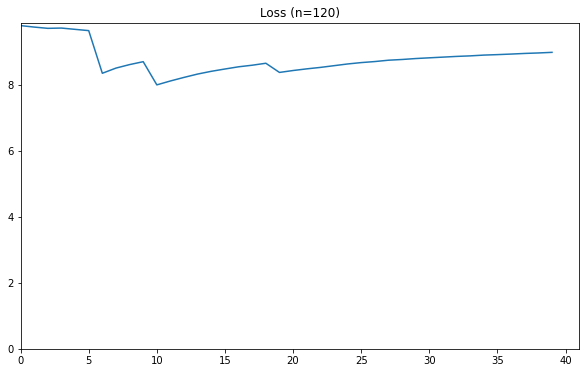

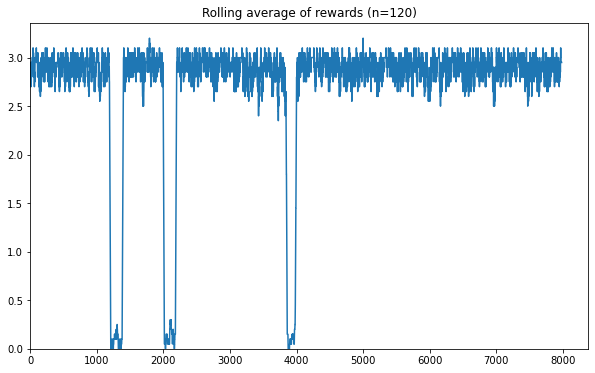

LAYER LENGTH: 124
[18:38:44] Commencement of training.
[18:38:45] Completed epoch 1: 9.490491871833802
[18:38:46] Completed epoch 2: 9.476495935916901
[18:38:47] Completed epoch 3: 9.517663957277934
[18:38:48] Completed epoch 4: 9.530747967958451
[18:38:49] Completed epoch 5: 9.54959837436676
[18:38:50] Completed epoch 6: 9.568831978638967
[18:38:51] Completed epoch 7: 9.580427410261972
[18:38:52] Completed epoch 8: 9.569436483979224
[18:38:53] Completed epoch 9: 9.568387985759312
[18:38:54] Completed epoch 10: 9.57804918718338
[18:38:55] Completed epoch 11: 9.572544715621255
[18:38:56] Completed epoch 12: 9.575040989319483
[18:38:57] Completed epoch 13: 9.233307067064139
[18:38:58] Completed epoch 14: 9.268606562273844
[18:38:59] Completed epoch 15: 9.292699458122254
[18:38:59] Completed epoch 16: 9.301124491989613
[18:39:00] Completed epoch 17: 9.316646580696107
[18:39:01] Completed epoch 18: 9.334055103990767
[18:39:02] Completed epoch 19: 9.3460785195702
[18:39:03] Completed epoch 

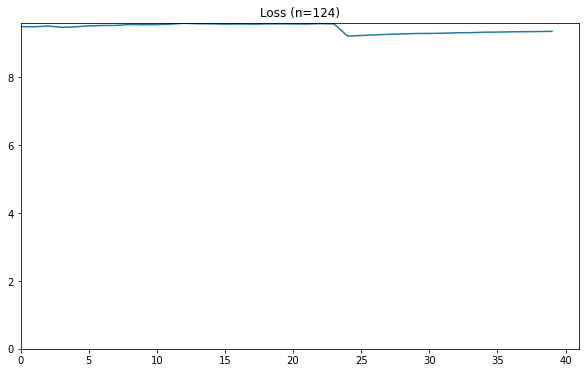

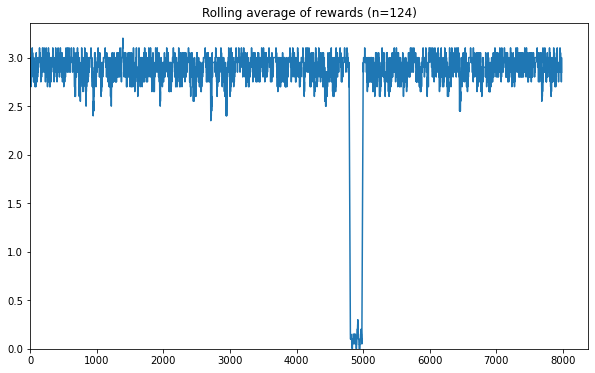

In [4]:
for n in range(4, 128, 4):
    print("LAYER LENGTH:", n)
    print("=================")

    env = get_env()
    agent = QLearningTest(n)
    env.train(
        trainee=agent,
        continuation_probability=1,
        limit=200,
        noise=0,
        repetitions=1,
        epochs=20,
    )

    # print(agent._q_network)
    # print(env.counts)

    # s = sum(env.counts.values())
    # print({a: env.counts[a] / s for a in env.counts})

    plt.title(f"Loss (n={n})")
    plt.plot(env.metric_history)
    plt.xlim(left=0)
    plt.ylim(bottom=0)
    plt.show()

    N = 20

    plt.title(f"Rolling average of rewards (n={n})")
    plt.plot(np.convolve(env.rewards, np.ones(N), mode='valid') / N)
    plt.xlim(left=0)
    plt.ylim(bottom=0)
    plt.show()

    # agent._q_network.eval()
    # play_tournament(agent)

    # plt.title("Cumulative regret (vs cooperating)")
    # plt.plot(np.cumsum(3 - np.array(env.rewards)))
    # plt.xlim(left=0)
    # plt.ylim(bottom=0)
    # plt.show()